## league of legends basic stats#

In [2]:
#riot watcher
#!pip install riotwatcher


In [41]:
#import
from riotwatcher import LolWatcher
import numpy as np

In [4]:
watcher = LolWatcher

In [5]:
#Api Key Summoner Values 
riotApiKey = "RGAPI-d318626d-8fb5-4aa5-b01e-59b7bea0bb98"
watcher = LolWatcher(riotApiKey)
region= "LA1"
Name = "zancho"


In [6]:
#api key summoner
me = summoner=watcher.summoner.by_name(region,Name)
print(me)

{'id': '5sdDUOEv2azYwGa6jdIYLp4TPGNm2IMpcTj1gTDYt7Gq', 'accountId': 'O7RFjaC8GPinAMQsljw-TI5z0yEuMWSJOPeAOri8GIS9uOY', 'puuid': 'INqu6G7AXETPs_AaQVFPu9XvTBu87dZiKRz4rVAsOUsobfZrp3keA9ZKSJ4mEPJ0c6PdgPZCWQiJFg', 'name': 'zancho', 'profileIconId': 1596, 'revisionDate': 1667915203385, 'summonerLevel': 598}


In [7]:
#summoner stats
my_ranked_stats = watcher.league.by_summoner(region, me['id'])
print(my_ranked_stats)

[{'leagueId': '19eb4b26-d6f5-4091-b101-1272db917bf8', 'queueType': 'RANKED_FLEX_SR', 'tier': 'PLATINUM', 'rank': 'IV', 'summonerId': '5sdDUOEv2azYwGa6jdIYLp4TPGNm2IMpcTj1gTDYt7Gq', 'summonerName': 'zancho', 'leaguePoints': 75, 'wins': 225, 'losses': 199, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}, {'leagueId': '0bed377f-b592-4985-8602-e8fcad8313cf', 'queueType': 'RANKED_SOLO_5x5', 'tier': 'PLATINUM', 'rank': 'III', 'summonerId': '5sdDUOEv2azYwGa6jdIYLp4TPGNm2IMpcTj1gTDYt7Gq', 'summonerName': 'zancho', 'leaguePoints': 16, 'wins': 393, 'losses': 391, 'veteran': True, 'inactive': False, 'freshBlood': False, 'hotStreak': False}]


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.DataFrame(my_ranked_stats)

In [10]:
df

,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
0,19eb4b26-d6f5-4091-b101-1272db917bf8,RANKED_FLEX_SR,PLATINUM,IV,5sdDUOEv2azYwGa6jdIYLp4TPGNm2IMpcTj1gTDYt7Gq,zancho,75,225,199,False,False,False,False
1,0bed377f-b592-4985-8602-e8fcad8313cf,RANKED_SOLO_5x5,PLATINUM,III,5sdDUOEv2azYwGa6jdIYLp4TPGNm2IMpcTj1gTDYt7Gq,zancho,16,393,391,True,False,False,False


In [11]:
#metrics
df.columns
df.values
df.index
df.describe()

,leaguePoints,wins,losses
count,2.0000,2.000000,2.000000
mean,45.5000,309.000000,295.000000
std,41.7193,118.793939,135.764502
min,16.0000,225.000000,199.000000
25%,30.7500,267.000000,247.000000
50%,45.5000,309.000000,295.000000
75%,60.2500,351.000000,343.000000
max,75.0000,393.000000,391.000000


In [12]:
columns_names = df.columns.values

In [13]:
indices = list(columns_names)

Text(0.5, 1.0, 'losses')

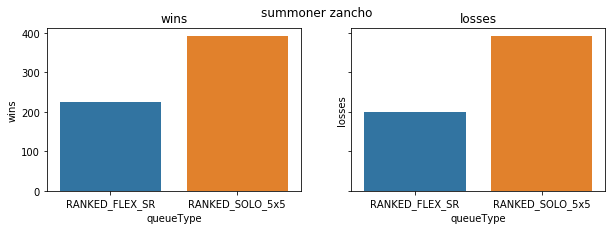

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
fig.suptitle('summoner zancho')

# Wins
sns.barplot(ax=axes[0], x=df['queueType'], y=df['wins'])
axes[0].set_title('wins')

# Losses
sns.barplot(ax=axes[1], x=df['queueType'] ,y=df['losses'])
axes[1].set_title('losses')



In [15]:
import requests
#REQUEST FOR EXTRACTING DATA FROM LEAGUE OF LEGENDS DATABASE.

In [16]:
url = "https://la1.api.riotgames.com/lol/summoner/v4/summoners/by-name/zancho?api_key=RGAPI-d318626d-8fb5-4aa5-b01e-59b7bea0bb98"

In [17]:

resp = requests.get(url)


In [18]:
info = resp.json()

In [19]:
info

{'id': '5sdDUOEv2azYwGa6jdIYLp4TPGNm2IMpcTj1gTDYt7Gq',
 'accountId': 'O7RFjaC8GPinAMQsljw-TI5z0yEuMWSJOPeAOri8GIS9uOY',
 'puuid': 'INqu6G7AXETPs_AaQVFPu9XvTBu87dZiKRz4rVAsOUsobfZrp3keA9ZKSJ4mEPJ0c6PdgPZCWQiJFg',
 'name': 'zancho',
 'profileIconId': 1596,
 'revisionDate': 1667915203385,
 'summonerLevel': 598}

In [20]:
#match consults
url2 = "https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/INqu6G7AXETPs_AaQVFPu9XvTBu87dZiKRz4rVAsOUsobfZrp3keA9ZKSJ4mEPJ0c6PdgPZCWQiJFg/ids?start=0&count=20&api_key=RGAPI-d318626d-8fb5-4aa5-b01e-59b7bea0bb98"

In [21]:
resp2 = requests.get(url2)
info2 = resp2.json()

In [22]:
#Id of matches that summoner played.
info2

['LA1_1320066330',
 'LA1_1320049085',
 'LA1_1320019775',
 'LA1_1319917433',
 'LA1_1319906316',
 'LA1_1319875187',
 'LA1_1319844464',
 'LA1_1319837869',
 'LA1_1319821385',
 'LA1_1319809829',
 'LA1_1319808007',
 'LA1_1319804045',
 'LA1_1319683638',
 'LA1_1319666380',
 'LA1_1319633868',
 'LA1_1319409898',
 'LA1_1319399302',
 'LA1_1319381370',
 'LA1_1319367561',
 'LA1_1319352005']

In [23]:
url3= "https://americas.api.riotgames.com/lol/match/v5/matches/LA1_1312558709?api_key=RGAPI-d318626d-8fb5-4aa5-b01e-59b7bea0bb98"

In [24]:
resp3 = requests.get(url3)
info3 = resp3.json()

In [25]:
#Json of Data provided on each match
info3



{'metadata': {'dataVersion': '2',
  'matchId': 'LA1_1312558709',
  'participants': ['ipOMEqLW9sCLtsUBvwFsB8Q4bVbGYh5WY0lPBqK6Fj2dXtRbmviw6ec4rqPWztscPUkKBNuS4l3ozA',
   'tGMMXmnX0qWjGkHgJdXWuoi93hOKz7D2lSyAzvB6e9PReC-Arf8NShHs2KzIxZz0D19YMbSMDp3Dhg',
   'NWd9AYdm9K3MB8H1og66ZVK2iXrw_ivQx3iEDxtVzeuZ756ewmta_o1pfP3YpTJC-zlt3sfXjgbqvA',
   '4t69bQw-YQ3_yJNx-Z8aOPZZeeAruSnsfSyJxqBUe0tetmCM0uDQb7g__8uv02QOJTteChQ7lLRXnA',
   'SBEkQP6f-Dwbg6dD23-lAtj-KxkqMxxJOjivn1g7TgqOeZOAEUapuMFKkCuX9bfUE8D2sqMQB2cYvg',
   'LrIMtlrQFuV4RacSf5HjVXhD-f3cptConsO_W8OMISJJJ1el5pOGaSUHiVok20Y4v5pGYgMT6DXz9Q',
   'tp87Y_DeRRSRofnLqFv48CgGI-6DRht2StJFPes8DqCgiW9vo0TAg0lsrXCMQsCFwshHHA3rHL4b0Q',
   'A5ygNPnaKdDa35pf42oUKjhrsc-JqhMKqSyNQnfL97Xe_85agkdzyxRD3V2oWujDTHgVZ0YZZ0ul2g',
   'INqu6G7AXETPs_AaQVFPu9XvTBu87dZiKRz4rVAsOUsobfZrp3keA9ZKSJ4mEPJ0c6PdgPZCWQiJFg',
   'yKuulOYw5wKjeBAGVGXkJfw4eMz6Vit6C846--8SCPPDau9voDo0vLF5RHeCc4FxdsbrW0oekqgK1g']},
 'info': {'gameCreation': 1666184675713,
  'gameDuration': 2187,
  

In [26]:
dfmatch = pd.DataFrame(info3.get('metadata'))

In [27]:
dfmatch

,dataVersion,matchId,participants
0,2,LA1_1312558709,ipOMEqLW9sCLtsUBvwFsB8Q4bVbGYh5WY0lPBqK6Fj2dXt...
1,2,LA1_1312558709,tGMMXmnX0qWjGkHgJdXWuoi93hOKz7D2lSyAzvB6e9PReC...
2,2,LA1_1312558709,NWd9AYdm9K3MB8H1og66ZVK2iXrw_ivQx3iEDxtVzeuZ75...
3,2,LA1_1312558709,4t69bQw-YQ3_yJNx-Z8aOPZZeeAruSnsfSyJxqBUe0tetm...
4,2,LA1_1312558709,SBEkQP6f-Dwbg6dD23-lAtj-KxkqMxxJOjivn1g7TgqOeZ...
5,2,LA1_1312558709,LrIMtlrQFuV4RacSf5HjVXhD-f3cptConsO_W8OMISJJJ1...
6,2,LA1_1312558709,tp87Y_DeRRSRofnLqFv48CgGI-6DRht2StJFPes8DqCgiW...
7,2,LA1_1312558709,A5ygNPnaKdDa35pf42oUKjhrsc-JqhMKqSyNQnfL97Xe_8...
8,2,LA1_1312558709,INqu6G7AXETPs_AaQVFPu9XvTBu87dZiKRz4rVAsOUsobf...
9,2,LA1_1312558709,yKuulOYw5wKjeBAGVGXkJfw4eMz6Vit6C846--8SCPPDau...


In [28]:
from pandas.io.json import json_normalize
jsonfinal=json_normalize(info3)
jsonfinal

,metadata.dataVersion,metadata.matchId,metadata.participants,info.gameCreation,info.gameDuration,info.gameEndTimestamp,info.gameId,info.gameMode,info.gameName,info.gameStartTimestamp,info.gameType,info.gameVersion,info.mapId,info.participants,info.platformId,info.queueId,info.teams,info.tournamentCode
0,2,LA1_1312558709,[ipOMEqLW9sCLtsUBvwFsB8Q4bVbGYh5WY0lPBqK6Fj2dX...,1666184675713,2187,1666186962446,1312558709,CLASSIC,teambuilder-match-1312558709,1666184775113,MATCHED_GAME,12.20.474.929,11,"[{'assists': 1, 'baronKills': 0, 'basicPings':...",LA1,420,"[{'bans': [{'championId': 24, 'pickTurn': 1}, ...",


In [29]:
#Conver Json in dataframe and normalize
dfinfo = json_normalize(info3,["info",['participants']],max_level=4)

#dfinfo= pd.DataFrame(info3.get('info'))
dfinfo

,assists,baronKills,basicPings,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,challenges.killsOnLanersEarlyJungleAsJungler,challenges.fasterSupportQuestCompletion,challenges.highestChampionDamage,challenges.highestCrowdControlScore,challenges.baronBuffGoldAdvantageOverThreshold,challenges.earliestBaron,challenges.fastestLegendary,challenges.firstTurretKilledTime,challenges.soloTurretsLategame,challenges.highestWardKills
0,1,0,13,0,12838,14,106,Volibear,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,0,110,0,16288,16,80,Pantheon,0,1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,0,59,0,17522,17,777,Yone,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,0,53,1,15992,16,18,Tristana,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,0,8,0,15902,16,50,Swain,0,4,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,0,13,0,21229,18,82,Mordekaiser,0,3,...,NaN,NaN,NaN,NaN,1.0,1745.885162,1189.809852,766.907593,1.0,NaN
6,8,2,132,1,18212,17,245,Ekko,0,6,...,0.0,NaN,NaN,NaN,1.0,1745.885162,NaN,766.907593,NaN,NaN
7,12,0,14,0,19630,18,86,Garen,0,3,...,NaN,NaN,NaN,NaN,1.0,1745.885162,NaN,766.907593,NaN,NaN
8,8,0,10,1,17940,17,236,Lucian,0,4,...,NaN,NaN,NaN,NaN,1.0,1745.885162,NaN,766.907593,NaN,NaN
9,14,0,10,7,17681,17,555,Pyke,0,7,...,NaN,NaN,NaN,NaN,1.0,1745.885162,NaN,766.907593,NaN,1.0


In [30]:
dfinfo.columns


Index(['assists', 'baronKills', 'basicPings', 'bountyLevel', 'champExperience',
       'champLevel', 'championId', 'championName', 'championTransform',
       'consumablesPurchased',
       ...
       'challenges.killsOnLanersEarlyJungleAsJungler',
       'challenges.fasterSupportQuestCompletion',
       'challenges.highestChampionDamage',
       'challenges.highestCrowdControlScore',
       'challenges.baronBuffGoldAdvantageOverThreshold',
       'challenges.earliestBaron', 'challenges.fastestLegendary',
       'challenges.firstTurretKilledTime', 'challenges.soloTurretsLategame',
       'challenges.highestWardKills'],
      dtype='object', length=232)

In [31]:
#verify null columns.
dfinfo.isnull()

,assists,baronKills,basicPings,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,challenges.killsOnLanersEarlyJungleAsJungler,challenges.fasterSupportQuestCompletion,challenges.highestChampionDamage,challenges.highestCrowdControlScore,challenges.baronBuffGoldAdvantageOverThreshold,challenges.earliestBaron,challenges.fastestLegendary,challenges.firstTurretKilledTime,challenges.soloTurretsLategame,challenges.highestWardKills
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,True,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,True,False,True,True
7,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,False,True,True
8,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,False,True,True
9,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False


In [32]:
dfinfo.isnull().sum(axis=0)

assists                             0
baronKills                          0
basicPings                          0
bountyLevel                         0
champExperience                     0
                                   ..
challenges.earliestBaron            5
challenges.fastestLegendary         9
challenges.firstTurretKilledTime    5
challenges.soloTurretsLategame      9
challenges.highestWardKills         9
Length: 232, dtype: int64

In [33]:
df_info2= dfinfo.dropna(axis=1)
df_info2

,assists,baronKills,basicPings,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,challenges.unseenRecalls,challenges.visionScoreAdvantageLaneOpponent,challenges.visionScorePerMinute,challenges.wardTakedowns,challenges.wardTakedownsBefore20M,challenges.wardsGuarded,perks.statPerks.defense,perks.statPerks.flex,perks.statPerks.offense,perks.styles
0,1,0,13,0,12838,14,106,Volibear,0,6,...,1,-0.162525,0.670277,0,0,0,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
1,7,0,110,0,16288,16,80,Pantheon,0,1,...,0,-0.649232,0.309075,0,0,0,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
2,9,0,59,0,17522,17,777,Yone,0,4,...,0,-0.407222,0.372442,2,0,0,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
3,10,0,53,1,15992,16,18,Tristana,0,3,...,0,-0.385020,0.421177,2,1,0,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
4,13,0,8,0,15902,16,50,Swain,0,4,...,0,-0.267925,1.800041,5,3,0,5002,5008,5008,"[{'description': 'primaryStyle', 'selections':..."
5,5,0,13,0,21229,18,82,Mordekaiser,0,3,...,0,0.194066,0.800355,2,1,1,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
6,8,2,132,1,18212,17,245,Ekko,0,6,...,0,1.850888,0.881138,3,2,1,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
7,12,0,14,0,19630,18,86,Garen,0,3,...,0,0.686973,0.628300,2,0,0,5002,5008,5008,"[{'description': 'primaryStyle', 'selections':..."
8,8,0,10,1,17940,17,236,Lucian,0,4,...,0,0.626070,0.684864,1,0,0,5001,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
9,14,0,10,7,17681,17,555,Pyke,0,7,...,0,0.365980,2.458819,14,4,0,5002,5008,5008,"[{'description': 'primaryStyle', 'selections':..."


In [34]:
df_info2.isna().sum(axis=0)

assists                    0
baronKills                 0
basicPings                 0
bountyLevel                0
champExperience            0
                          ..
challenges.wardsGuarded    0
perks.statPerks.defense    0
perks.statPerks.flex       0
perks.statPerks.offense    0
perks.styles               0
Length: 216, dtype: int64

In [35]:
#Whereas is a large dataset we have to know the type of the data it contains,
#firt of all we can filter int and float columns and decide which could help us to know information about win condition.
#for this we can use information from the official website that explains the information of each column
#in this case we are going to select some columns that we think could determine win or loss 
#win 
#damageDealtToBuildings
#dragonKills
#inhibitorKills
#inhibitorsLost
#itemsPurchased
#kills
#goldEarned
#goldSpent
#magicDamageDealt
#magicDamageDealtToChampions
#magicDamageDealt
#physicalDamageDealt
#physicalDamageDealtToChampions
#physicalDamageTaken
#trueDamageDealt
#trueDamageDealtToChampions
#trueDamageTaken

df_info2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 216 entries, assists to perks.styles
dtypes: bool(9), float64(15), int64(181), object(11)
memory usage: 16.4+ KB


In [75]:
data_win = df_info2[["win"]]
data_win= data_win.win.replace({True:1,False:0})

In [170]:
#data_selected = df_info2.select_dtyp(include=['int64'])

data_selected = df_info2[["damageDealtToBuildings","dragonKills","inhibitorKills","inhibitorsLost","itemsPurchased","kills","goldEarned","goldSpent","magicDamageDealt","magicDamageDealtToChampions","physicalDamageDealt","physicalDamageDealtToChampions","physicalDamageTaken","trueDamageDealt","trueDamageDealtToChampions","trueDamageTaken"]]
data_final = pd.concat([data_win, data_selected], axis=1)

In [171]:
duplicates = []
for col in range(data_final.shape[1]):
    contents = data_final.iloc[:, col]
    
    for comp in range(col + 1, data_final.shape[1]):
        if contents.equals(data_final.iloc[:, comp]):
            duplicates.append(comp)
duplicates = np.unique(duplicates).tolist()

In [172]:
#duplicates
#data_final.drop(data_final.columns[duplicates], axis=1)

In [173]:
data_final

,win,damageDealtToBuildings,dragonKills,inhibitorKills,inhibitorsLost,itemsPurchased,kills,goldEarned,goldSpent,magicDamageDealt,magicDamageDealtToChampions,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken
0,0,3869,0,0,3,28,1,10803,10775,64223,3193,71822,4327,10367,4742,182,1770
1,0,0,1,0,3,22,11,15505,15175,7344,2014,183798,18177,23532,6434,1194,3465
2,0,3832,0,0,3,26,6,14997,14850,34265,6961,172423,21258,18967,4117,1033,7065
3,0,1134,0,0,3,26,5,13353,12575,31246,1501,155597,21349,18125,19664,2927,2086
4,0,1088,0,0,3,21,8,12190,11125,95179,34484,5594,1454,19920,6277,2196,2862
5,1,7481,0,0,0,19,11,17696,16475,196026,24700,28877,2576,22805,12103,3916,2043
6,1,1894,2,1,0,24,7,16648,14475,235485,17767,33340,1834,26998,21265,1011,540
7,1,10840,0,2,0,18,6,15515,13600,482,482,186777,16700,27876,11062,6096,2233
8,1,2779,2,0,0,28,7,14599,14050,10001,1759,188010,25104,16298,16894,1513,1930
9,1,2547,0,0,0,29,13,14943,13525,0,0,44007,15574,14930,12112,4418,785


columna:  0
Contenido de la columna:  [0 0 0 0 0 1 1 1 1 1]


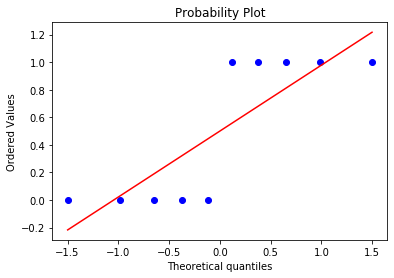

columna:  1
Contenido de la columna:  [ 3869     0  3832  1134  1088  7481  1894 10840  2779  2547]


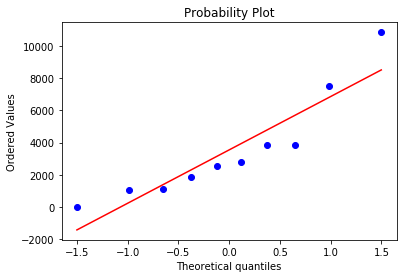

columna:  2
Contenido de la columna:  [0 1 0 0 0 0 2 0 2 0]


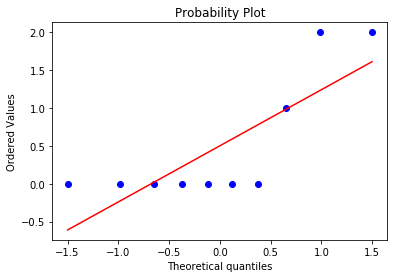

columna:  3
Contenido de la columna:  [0 0 0 0 0 0 1 2 0 0]


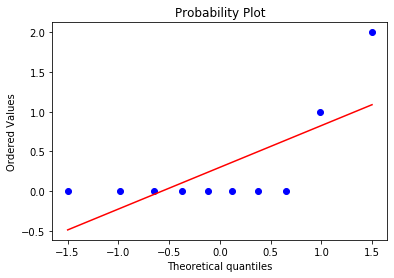

columna:  4
Contenido de la columna:  [3 3 3 3 3 0 0 0 0 0]


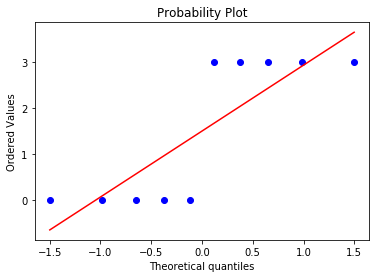

columna:  5
Contenido de la columna:  [28 22 26 26 21 19 24 18 28 29]


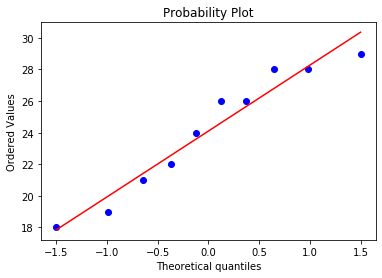

columna:  6
Contenido de la columna:  [ 1 11  6  5  8 11  7  6  7 13]


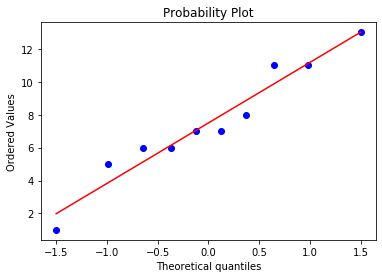

columna:  7
Contenido de la columna:  [10803 15505 14997 13353 12190 17696 16648 15515 14599 14943]


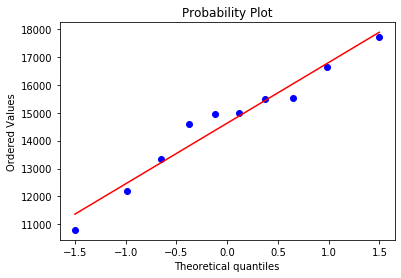

columna:  8
Contenido de la columna:  [10775 15175 14850 12575 11125 16475 14475 13600 14050 13525]


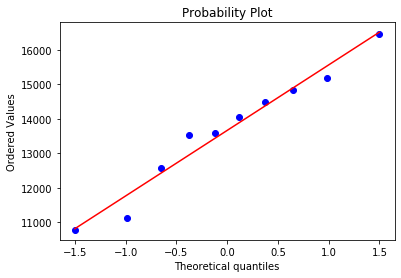

columna:  9
Contenido de la columna:  [ 64223   7344  34265  31246  95179 196026 235485    482  10001      0]


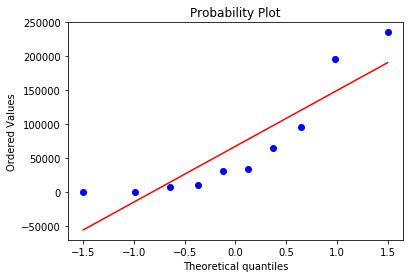

columna:  10
Contenido de la columna:  [ 3193  2014  6961  1501 34484 24700 17767   482  1759     0]


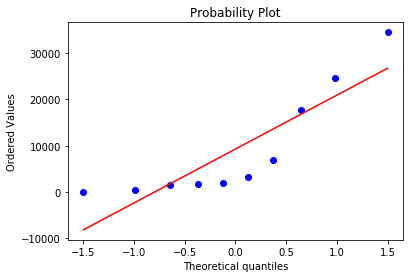

columna:  11
Contenido de la columna:  [ 71822 183798 172423 155597   5594  28877  33340 186777 188010  44007]


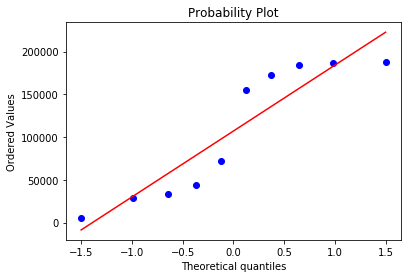

columna:  12
Contenido de la columna:  [ 4327 18177 21258 21349  1454  2576  1834 16700 25104 15574]


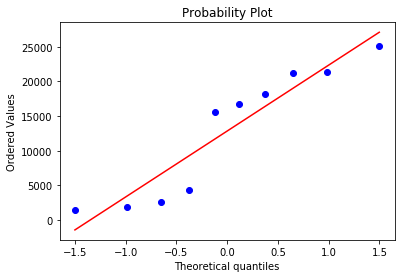

columna:  13
Contenido de la columna:  [10367 23532 18967 18125 19920 22805 26998 27876 16298 14930]


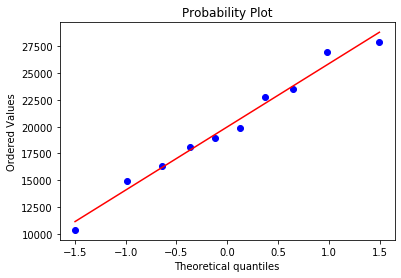

columna:  14
Contenido de la columna:  [ 4742  6434  4117 19664  6277 12103 21265 11062 16894 12112]


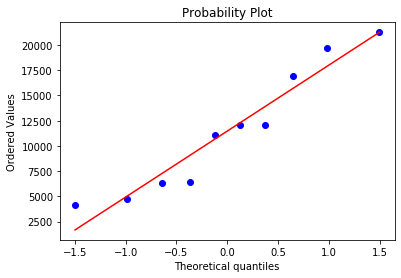

columna:  15
Contenido de la columna:  [ 182 1194 1033 2927 2196 3916 1011 6096 1513 4418]


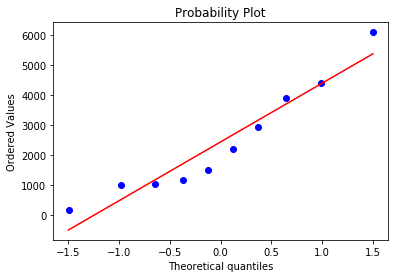

columna:  16
Contenido de la columna:  [1770 3465 7065 2086 2862 2043  540 2233 1930  785]


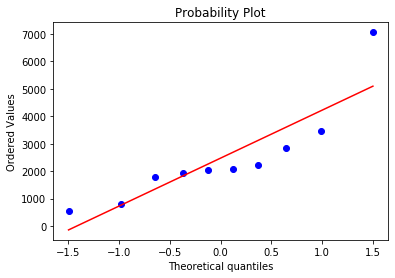

In [174]:
#visualization of dat in colums to verify the normal distribution of the variables
for index in range(data_final.shape[1]):
    print('columna: ', index)
    print('Contenido de la columna: ', data_final.iloc[: , index].values)
    stats.probplot( data_final.iloc[: , index],dist="norm", plot=pylab)
    pylab.show()

In [175]:
#correlation matrix  , we use spearman technique because not of all variables are in normal distribution, and have nominal variables as well.
corr_matrix = data_final.corr(method='spearman')
corr_matrix

,win,damageDealtToBuildings,dragonKills,inhibitorKills,inhibitorsLost,itemsPurchased,kills,goldEarned,goldSpent,magicDamageDealt,magicDamageDealtToChampions,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken
win,1.000000,0.452602,0.301232,0.496904,-1.000000,-0.070057,0.386501,0.591864,0.313340,-0.104447,-0.243709,0.034816,-0.104447,0.243709,0.591864,0.452602,-0.591864
damageDealtToBuildings,0.452602,1.000000,-0.352082,0.311400,-0.452602,-0.128051,-0.305823,0.272727,0.090909,-0.006061,-0.115152,0.175758,0.018182,-0.006061,-0.187879,0.224242,-0.151515
dragonKills,0.301232,-0.352082,1.000000,0.208488,-0.301232,0.116822,0.181444,0.254698,0.374555,0.097384,0.052438,0.314627,0.172296,0.232224,0.486922,-0.419502,-0.284662
inhibitorKills,0.496904,0.311400,0.208488,1.000000,-0.496904,-0.469956,-0.192054,0.510349,0.069200,0.017300,-0.138400,0.138400,-0.224900,0.700649,0.302750,0.155700,-0.207600
inhibitorsLost,-1.000000,-0.452602,-0.301232,-0.496904,1.000000,0.070057,-0.386501,-0.591864,-0.313340,0.104447,0.243709,-0.034816,0.104447,-0.243709,-0.591864,-0.452602,0.591864
itemsPurchased,-0.070057,-0.128051,0.116822,-0.469956,0.070057,1.000000,-0.104616,-0.542693,-0.359763,-0.262200,-0.396349,0.152442,0.365860,-0.865870,0.115856,-0.323177,-0.451228
kills,0.386501,-0.305823,0.181444,-0.192054,-0.386501,-0.104616,1.000000,0.409803,0.452618,-0.152912,0.073398,-0.318056,-0.287474,0.177377,0.165145,0.373104,-0.067281
goldEarned,0.591864,0.272727,0.254698,0.510349,-0.591864,-0.542693,0.409803,1.000000,0.842424,0.115152,0.103030,-0.006061,-0.139394,0.745455,0.284848,0.248485,-0.018182
goldSpent,0.313340,0.090909,0.374555,0.069200,-0.313340,-0.359763,0.452618,0.842424,1.000000,0.103030,0.212121,0.151515,0.139394,0.527273,0.090909,0.018182,0.236364
magicDamageDealt,-0.104447,-0.006061,0.097384,0.017300,0.104447,-0.262200,-0.152912,0.115152,0.103030,1.000000,0.890909,-0.648485,-0.587879,0.163636,0.018182,-0.503030,-0.163636


In [176]:
#correlation matrix in a table.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
4,win,inhibitorsLost,-1.000000,1.000000
68,inhibitorsLost,win,-1.000000,1.000000
163,magicDamageDealt,magicDamageDealtToChampions,0.890909,0.890909
179,magicDamageDealtToChampions,magicDamageDealt,0.890909,0.890909
226,physicalDamageTaken,itemsPurchased,-0.865870,0.865870
98,itemsPurchased,physicalDamageTaken,-0.865870,0.865870
199,physicalDamageDealt,physicalDamageDealtToChampions,0.854545,0.854545
215,physicalDamageDealtToChampions,physicalDamageDealt,0.854545,0.854545
143,goldSpent,goldEarned,0.842424,0.842424
127,goldEarned,goldSpent,0.842424,0.842424


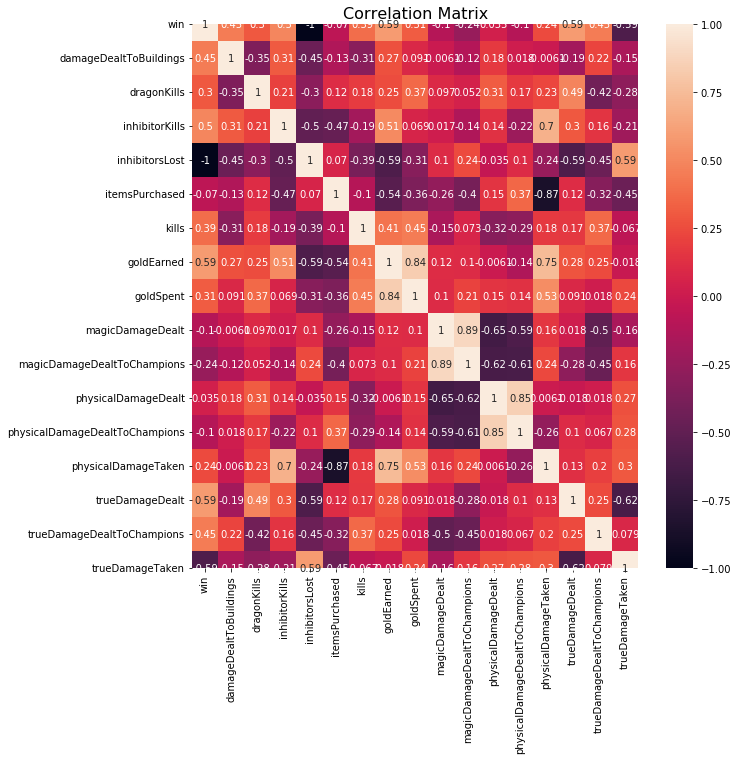

In [177]:
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix', fontsize=16)
sns.heatmap(corr_matrix, annot=True,)
plt.show()

In [178]:
#correlation for win condition.
import numpy as np
import scipy.stats
x = data_final["win"]
y = data_final["trueDamageDealt"]
scipy.stats.spearmanr(x, y) 

SpearmanrResult(correlation=0.5918640302493727, pvalue=0.07146084442365887)

In [179]:
data_final["magicDamageDealt"]

0     64223
1      7344
2     34265
3     31246
4     95179
5    196026
6    235485
7       482
8     10001
9         0
Name: magicDamageDealt, dtype: int64

In [191]:
for col in data_final:
    print(col)

win
damageDealtToBuildings
dragonKills
inhibitorKills
inhibitorsLost
itemsPurchased
kills
goldEarned
goldSpent
magicDamageDealt
magicDamageDealtToChampions
physicalDamageDealt
physicalDamageDealtToChampions
physicalDamageTaken
trueDamageDealt
trueDamageDealtToChampions
trueDamageTaken


In [214]:
data_correlation_win = pd.DataFrame(columns=["pair_win","correlacion"])
data_correlation_win
for col in data_final:
    print("correlacion win -",col)
    print('Correlación spearman: ', data_final['win'].corr(data_final[col], method='spearman'))
    data_correlation_win=data_correlation_win.append({'pair_win':col,'correlacion':data_final['win'].corr(data_final[col], method='spearman')},ignore_index=True)

correlacion win - win
Correlación spearman:  1.0
correlacion win - damageDealtToBuildings
Correlación spearman:  0.4526019054848144
correlacion win - dragonKills
Correlación spearman:  0.3012320380383547
correlacion win - inhibitorKills
Correlación spearman:  0.49690399499995325
correlacion win - inhibitorsLost
Correlación spearman:  -1.0
correlacion win - itemsPurchased
Correlación spearman:  -0.07005694441040589
correlacion win - kills
Correlación spearman:  0.3865006029094685
correlacion win - goldEarned
Correlación spearman:  0.5918640302493727
correlacion win - goldSpent
Correlación spearman:  0.31333978072025614
correlacion win - magicDamageDealt
Correlación spearman:  -0.10444659357341869
correlacion win - magicDamageDealtToChampions
Correlación spearman:  -0.24370871833797694
correlacion win - physicalDamageDealt
Correlación spearman:  0.034815531191139566
correlacion win - physicalDamageDealtToChampions
Correlación spearman:  -0.10444659357341869
correlacion win - physicalDama

In [217]:
#sort data about correlation, so we can identify, with this information we can conclude  those variables who affect the gameplay
#and those who have more more weight and influences more in the match , so the player could focus more to have a 
#better chance to win.

data_correlation_win.sort_values(by='correlacion', ascending=False)

,pair_win,correlacion
0,win,1.000000
7,goldEarned,0.591864
14,trueDamageDealt,0.591864
3,inhibitorKills,0.496904
15,trueDamageDealtToChampions,0.452602
1,damageDealtToBuildings,0.452602
6,kills,0.386501
8,goldSpent,0.313340
2,dragonKills,0.301232
13,physicalDamageTaken,0.243709
